**Importing All Necessary Modules and Packages**

In [1]:
#!pip install opendatasets
#!pip install pandas

In [2]:
 #import opendatasets as od
#import pandas as pd

 #od.download("https://www.kaggle.com/datasets/sovitrath/diabetic-retinopathy-224x224-gaussian-filtered") #f71ee8768a1e1d2d75715e68b2b7fd41

In [3]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from PIL import Image
import seaborn as sns
import matplotlib.pyplot as plt
import PIL
import plotly
import plotly.express as px
import gc

from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten,Input,ZeroPadding2D,BatchNormalization,Activation
from tensorflow.keras.metrics import BinaryAccuracy, Precision, Recall
from tensorflow.keras.layers.experimental import preprocessing

from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings("ignore")

**Importing the dataset**

In [6]:
#Locate the file in Personal Machine
path = 'E:\\TRY NEW\\gaussian_filtered_images'

In [7]:
No_DR_Img = os.listdir(path + '/No_DR/')
Mild_Img = os.listdir(path + '/Mild/')
Moderate_Img = os.listdir(path + '/Moderate/')
Proliferate_DR_Img = os.listdir(path + '/Proliferate_DR/')
Severe_Img = os.listdir(path + '/Severe/')

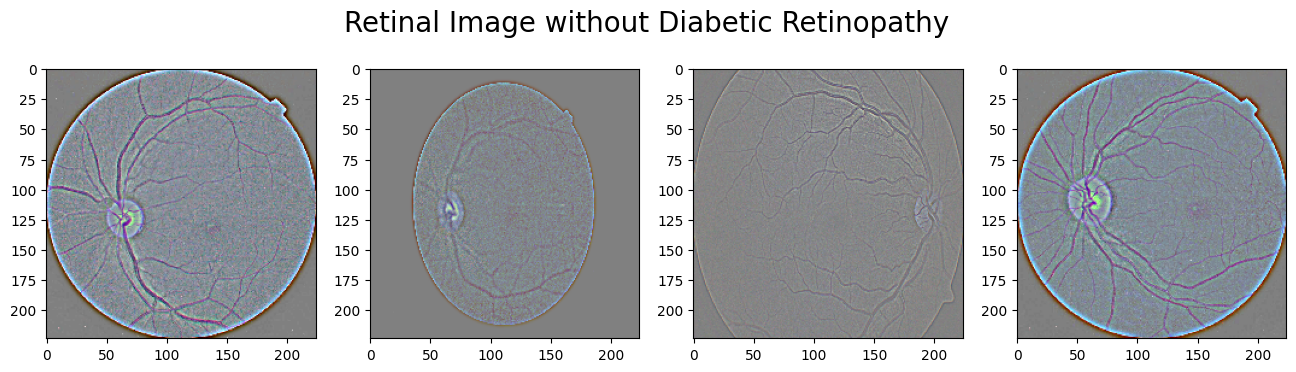

In [8]:
#Viewing the dataset
fig = plt.figure(figsize=(16,4))
for i in range(4):
    plt.subplot(1, 4, i+1)
    img = cv2.imread(path+'/No_DR/'+ No_DR_Img[i])
    plt.imshow(img)
plt.suptitle("Retinal Image without Diabetic Retinopathy",fontsize=20)
plt.show()

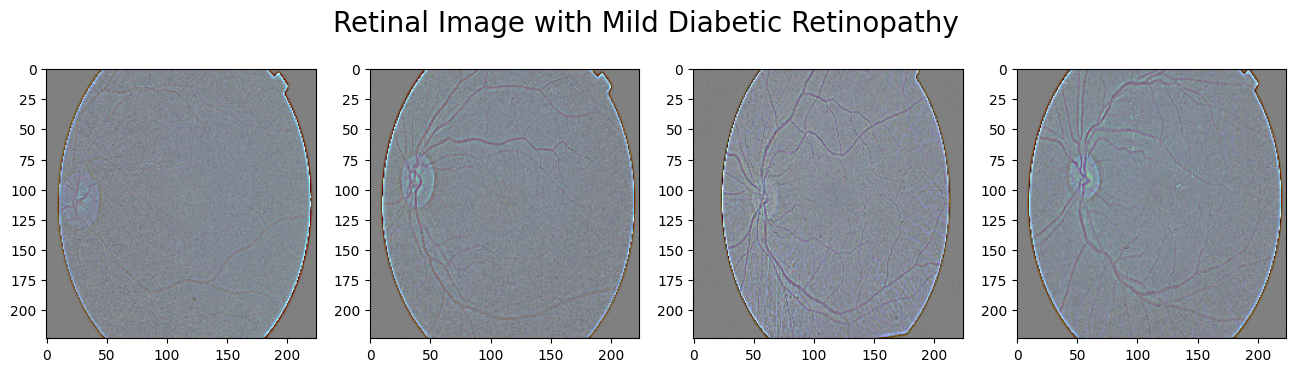

In [9]:
#Viewing the dataset
fig = plt.figure(figsize=(16,4))
for i in range(4):
    plt.subplot(1, 4, i+1)
    img = cv2.imread(path+'/Mild/'+ Mild_Img[i])
    plt.imshow(img)
plt.suptitle("Retinal Image with Mild Diabetic Retinopathy",fontsize=20)
plt.show()

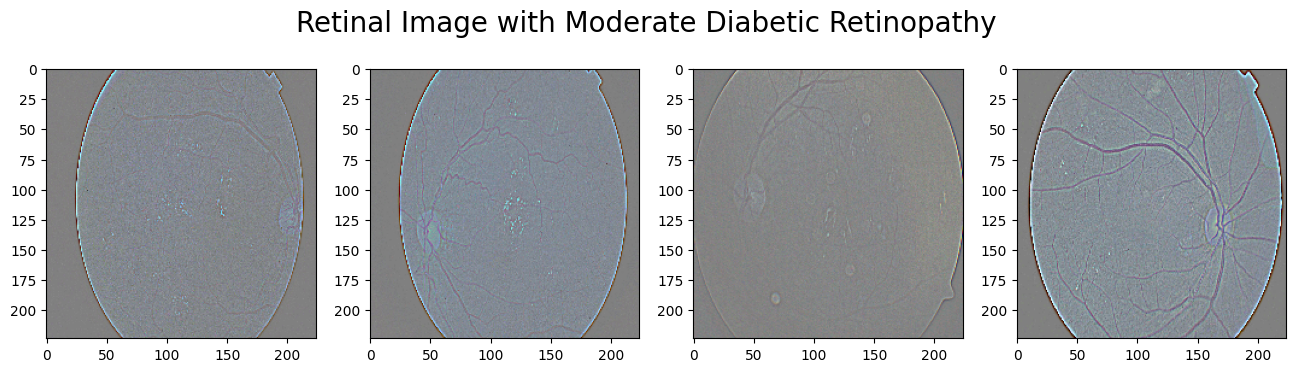

In [10]:
#Viewing the dataset
fig = plt.figure(figsize=(16,4))
for i in range(4):
    plt.subplot(1, 4, i+1)
    img = cv2.imread(path+'/Moderate/'+ Moderate_Img[i])
    plt.imshow(img)
plt.suptitle("Retinal Image with Moderate Diabetic Retinopathy",fontsize=20)
plt.show()

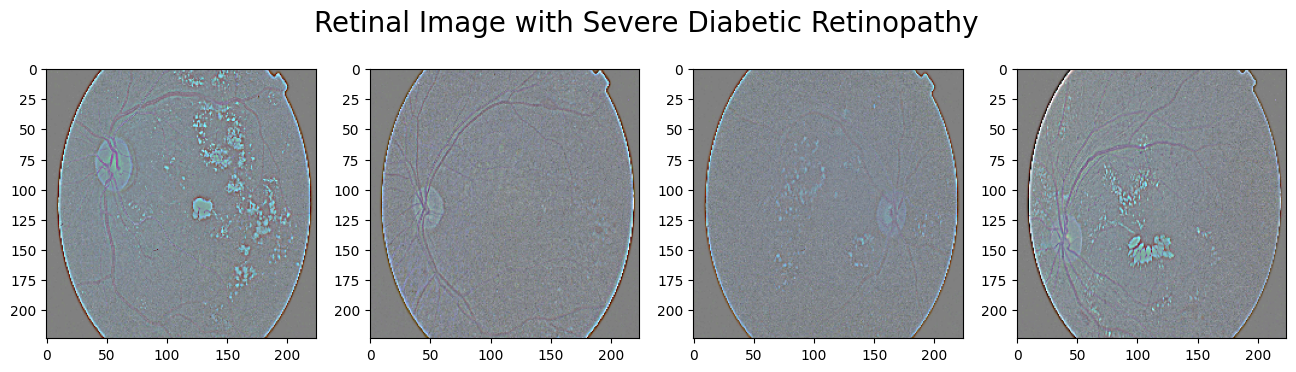

In [11]:
#Viewing the dataset
fig = plt.figure(figsize=(16,4))
for i in range(4):
    plt.subplot(1, 4, i+1)
    img = cv2.imread(path+'/Severe/'+ Severe_Img[i])
    plt.imshow(img)
plt.suptitle("Retinal Image with Severe Diabetic Retinopathy",fontsize=20)
plt.show()

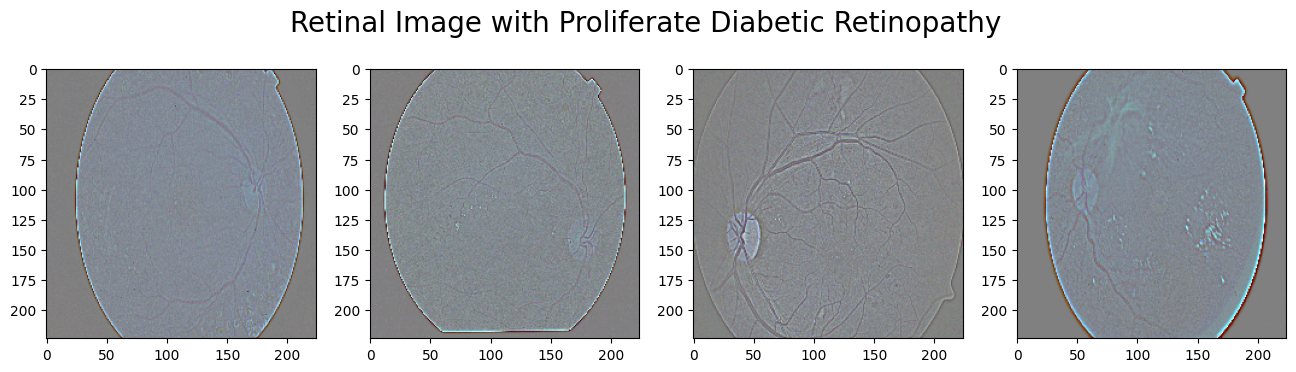

In [12]:
#Viewing the dataset
fig = plt.figure(figsize=(16,4))
for i in range(4):
    plt.subplot(1, 4, i+1)
    img = cv2.imread(path+'/Proliferate_DR/'+ Proliferate_DR_Img[i])
    plt.imshow(img)
plt.suptitle("Retinal Image with Proliferate Diabetic Retinopathy",fontsize=20)
plt.show()

In [13]:
Classes = {'No_DR':0, 'Mild':1, 'Moderate':2, 'Severe':3, 'Proliferate_DR':4}

**Data PreProcessing**

In [14]:
gc.collect()

47990

In [15]:
#Normalizing pixel values
X = []
y = []
desired_size = (128, 128) 

for i in Classes:
    folder_path ='gaussian_filtered_images/' +i
    for j in os.listdir(folder_path):
        img = cv2.imread(folder_path+'/'+j)
        img = cv2.resize(img, desired_size)
        # normalize values
        img = img / 255  #-->Apply normalization because we want pixel values to be scaled to the range 0-1
        X.append(img)
        y.append(Classes[i])

In [16]:
X = np.array(X)
y = np.array(y)

X.shape, y.shape

((3662, 128, 128, 3), (3662,))

**Dataset Analysis**

In [17]:
#Class division

Class_series=pd.Series(y)
lis=["No_DR","Mild","Moderate","Severe","Proliferate_DR"]
DR_or_not = Class_series.value_counts().tolist()
values = [DR_or_not[0], DR_or_not[1], DR_or_not[2], DR_or_not[3], DR_or_not[4]]
fig = px.pie(values=Class_series.value_counts(), names=lis , width=800, height=400, color_discrete_sequence=["skyblue","black","pink","purple","blue"]
             ,title="percentage among the different Severities of DR")
fig.show()

In [18]:
# new_width = 64  # Set your desired width
# new_height = 64  # Set your desired height

# resized_images = [cv2.resize(img, (new_width, new_height)) for img in X]


In [19]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Apply data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)

# Reshape X to have the correct dimensions
X = X.reshape(X.shape[0], 128, 128, 3)

datagen.fit(X)


In [20]:
from imblearn.over_sampling import SMOTE
# Using SMOTE to oversample the minority class(Edema) to avoid class imbalance
sm = SMOTE(random_state = 2)
X, y = sm.fit_resample(X.reshape(X.shape[0], -1), y.ravel())

In [21]:
#Class division

Class_series=pd.Series(y)
lis=["No_DR","Mild","Moderate","Severe","Proliferate_DR"]
DR_or_not = Class_series.value_counts().tolist()
values = [DR_or_not[0], DR_or_not[1], DR_or_not[2], DR_or_not[3], DR_or_not[4]]
fig = px.pie(values=Class_series.value_counts(), names=lis , width=800, height=400, color_discrete_sequence=["skyblue","black","pink","purple","blue"]
             ,title="percentage among the different Severities of DR")
fig.show()

In [22]:
X[0].shape

(49152,)

In [23]:
#X = X.reshape(X.shape[0], 128, 128, 3)


In [24]:
X[0].shape

(49152,)

In [25]:
gc.collect()

12651

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=32, stratify=y)
#used stratify to balance the number of examples for each class

In [27]:
X_train.shape

(7220, 49152)

In [28]:
X_test.shape

(1805, 49152)

In [29]:
X_train.size

354877440

In [30]:
X_test.size

88719360

In [31]:
# Reshape the arrays
X_train = X_train.reshape((-1, 128, 128, 3))
X_test = X_test.reshape((-1, 128, 128, 3))

In [32]:
print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)


Training data shape: (7220, 128, 128, 3)
Testing data shape: (1805, 128, 128, 3)


# **Import the Model Architecture (ResNet18)**

In [33]:
import torch
import torch.nn as nn
import torchvision.models as models
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, TensorDataset

In [34]:
# Load pre-trained ResNet18 model
resnet18 = models.resnet18(pretrained=True)

In [35]:
# Freeze model parameters
for param in resnet18.parameters():
    param.requires_grad = False

In [36]:
# Modify the last fully connected layer to fit your classification task
num_ftrs = resnet18.fc.in_features
resnet18.fc = nn.Linear(num_ftrs, 5)  # Assuming you have 5 classes

In [37]:
# Print the modified ResNet18 architecture
print(resnet18)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [38]:
import torch
import torchvision.models as models

# Check if CUDA is available and select device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


# Move the model to the selected device
resnet18.to(device)

# Verify the device assignment
print(next(resnet18.parameters()).device)  # Output should be "cuda" or "cpu"


cpu


In [39]:
# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(resnet18.parameters(), lr=0.001)

In [40]:
# Define transformations for data augmentation
train_transform = transforms.Compose([
    transforms.RandomResizedCrop(224),  # Random resized crop
    transforms.RandomHorizontalFlip(),  # Random horizontal flip
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),  # Color jitter
    transforms.RandomRotation(degrees=20),  # Random rotation
    transforms.ToTensor(),  # Convert image to tensor
])

In [41]:
# Define number of epochs
num_epochs = 10  # You can adjust this number as needed

In [42]:
import torch.nn.init as init

# Initialize the model with Glorot (Xavier) uniform weights
def weights_init(m):
    if isinstance(m, nn.Conv2d) or isinstance(m, nn.Linear):
        init.xavier_uniform_(m.weight.data)

# Apply weight initialization to the model
resnet18.apply(weights_init)

# Define the optimizer with a learning rate of 0.001
optimizer = torch.optim.Adam(resnet18.parameters(), lr=0.001)

# Define the batch size
batch_size = 4

# Assuming X_test_tensor is your test input data tensor
X_test_tensor = torch.tensor(X_test.transpose((0, 3, 1, 2)), dtype=torch.float32) # Convert and rearrange dimensions, then convert to float32 and move to GPU

# Assuming y_test_tensor is your test target tensor
y_test_tensor = torch.tensor(y_test, dtype=torch.long)  # Convert y_test to tensor of type long and move to GPU

# Create TensorDataset for test data
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

# Create DataLoader for test data
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)




In [43]:

# Assuming X_test_tensor is your test input data tensor
X_train_tensor = torch.tensor(X_train.transpose((0, 3, 1, 2)), dtype=torch.float32) # Convert and rearrange dimensions, then convert to float32 and move to GPU

# Assuming y_test_tensor is your test target tensor
y_train_tensor = torch.tensor(y_train, dtype=torch.long)  # Convert y_test to tensor of type long and move to GPU

# Create TensorDataset for test data
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)

In [44]:
# Check the structure of the first sample in your dataset
sample = train_dataset[0]
print(len(sample))  # This should output 2


2


In [45]:
best_accuracy = 0.0
best_loss = float('inf')


In [53]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models
from torch.utils.data import DataLoader
from torch.nn.init import xavier_uniform_, kaiming_normal_
import itertools

# Define hyperparameters
learning_rates = [0.001]
optimizers = [optim.Adam]
weight_initializers = [xavier_uniform_, kaiming_normal_]
batch_sizes = [4]

# Initialize a dictionary to store results
results = {}

# Define the number of epochs
num_epochs = 1  # Changed to 1 epoch

# Select one combination of hyperparameters
lr = learning_rates[0]
optimizer = optimizers[0]
weight_initializer = weight_initializers[0]
batch_size = batch_sizes[0]

# Initialize ResNet18 model
resnet18 = models.resnet18(pretrained=True)

# Freeze model parameters
for param in resnet18.parameters():
    param.requires_grad = False

# Modify the last fully connected layer
num_ftrs = resnet18.fc.in_features
resnet18.fc = nn.Linear(num_ftrs, 5)  # Assuming 5 classes

# Initialize the model with Glorot (Xavier) uniform weights
def weights_init(m):
    if isinstance(m, nn.Conv2d) or isinstance(m, nn.Linear):
        if hasattr(m, 'weight'):
            init.xavier_uniform_(m.weight.data)

# Move the model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
resnet18.to(device)

# Define loss function
criterion = nn.CrossEntropyLoss()

# Define optimizer
optimizer_instance = optimizer(resnet18.parameters(), lr=lr)

# Define train loader with current batch size
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# Define test loader
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Initialize a dictionary to store training history
history = {
    'train_loss': [],
    'train_accuracy': [],
    'test_loss': [],
    'test_accuracy': []
}

# Training loop
for epoch in range(num_epochs):
    # Set the model to training mode
    resnet18.train()

    running_loss = 0.0
    correct_predictions = 0
    total_samples = 0

    for inputs, labels in train_loader:
        inputs, labels = inputs.float().to(device), labels.to(device)

        # Zero the gradients
        optimizer_instance.zero_grad()

        # Forward pass
        outputs = resnet18(inputs)

        # Compute loss
        loss = criterion(outputs, labels)

        # Backward pass
        loss.backward()

        # Update weights
        optimizer_instance.step()

        # Update statistics
        running_loss += loss.item() * inputs.size(0)
        _, predicted = torch.max(outputs, 1)
        correct_predictions += (predicted == labels).sum().item()
        total_samples += labels.size(0)

    # Calculate training loss and accuracy
    epoch_loss = running_loss / total_samples
    epoch_acc = correct_predictions / total_samples

    # Append the training loss and accuracy to the history dictionary
    history['train_loss'].append(epoch_loss)
    history['train_accuracy'].append(epoch_acc)

    # After each epoch, evaluate the model on the test set
    resnet18.eval()
    test_correct_predictions = 0
    test_total_samples = 0
    test_loss = 0.0

    # Disable gradient computation for evaluation
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = resnet18(inputs)
            loss = criterion(outputs, labels)
            test_loss += loss.item() * inputs.size(0)
            _, predicted = torch.max(outputs, 1)
            test_correct_predictions += (predicted == labels).sum().item()
            test_total_samples += labels.size(0)

    # Calculate test accuracy
    test_accuracy = test_correct_predictions / test_total_samples

    # Calculate average test loss
    test_loss /= test_total_samples

    # Append test loss and accuracy to the history dictionary
    history['test_loss'].append(test_loss)
    history['test_accuracy'].append(test_accuracy)

    print(f'Epoch [{epoch+1}/{num_epochs}], '
          f'Training Loss: {epoch_loss:.4f}, '
          f'Training Accuracy: {epoch_acc:.4f}, '
          f'Test Loss: {test_loss:.4f}, '
          f'Test Accuracy: {test_accuracy:.4f}')

# Store results for this configuration
results[(lr, optimizer.__name__, weight_initializer.__name__, batch_size)] = history


Epoch [1/1], Training Loss: 1.2812, Training Accuracy: 0.4730, Test Loss: 1.0593, Test Accuracy: 0.6006


In [54]:
best_accuracy = 0.0
best_config = None

for config, history in results.items():
    test_accuracy = history['test_accuracy'][-1]  # Get the test accuracy from the last epoch
    
    # Check if the current configuration has higher test accuracy than the previous best
    if test_accuracy > best_accuracy:
        best_accuracy = test_accuracy
        best_config = config

print("Best configuration:")
print("Learning Rate:", best_config[0])
print("Optimizer:", best_config[1])
print("Weight Initializer:", best_config[2])
print("Batch Size:", best_config[3])
print("Test Accuracy:", best_accuracy)


Best configuration:
Learning Rate: 0.001
Optimizer: Adam
Weight Initializer: xavier_uniform_
Batch Size: 4
Test Accuracy: 0.6005540166204986


In [55]:
# Retrieve the history for the best configuration
best_history = results[best_config]

# Extract the training and test metrics
best_train_loss = best_history['train_loss'][-1]
best_train_accuracy = best_history['train_accuracy'][-1]
best_test_loss = best_history['test_loss'][-1]
best_test_accuracy = best_history['test_accuracy'][-1]

# Print the metrics
print("Best Configuration Metrics:")
print("Training Loss:", best_train_loss)
print("Training Accuracy:", best_train_accuracy)
print("Test Loss:", best_test_loss)
print("Test Accuracy:", best_test_accuracy)


Best Configuration Metrics:
Training Loss: 1.2812442638207011
Training Accuracy: 0.4729916897506925
Test Loss: 1.059300441920262
Test Accuracy: 0.6005540166204986


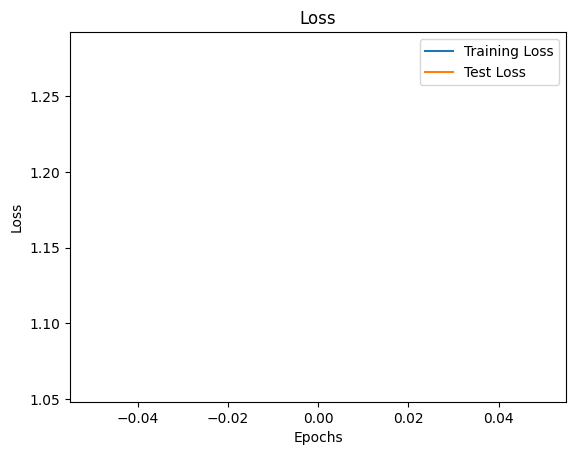

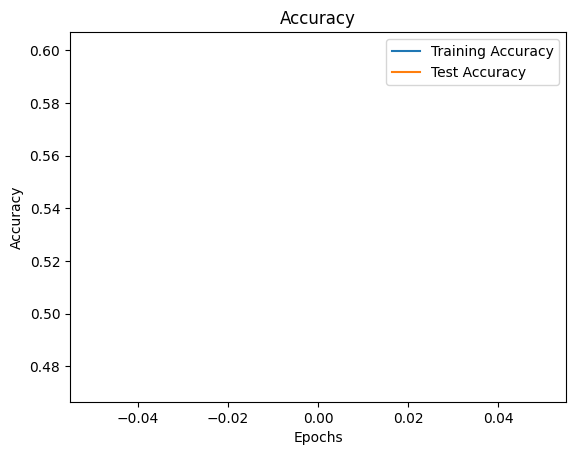

In [56]:
import matplotlib.pyplot as plt

def plot_metrics(history):
    train_loss = history['train_loss']
    test_loss = history['test_loss']
    train_accuracy = history['train_accuracy']
    test_accuracy = history['test_accuracy']

    # Loss
    plt.figure()
    plt.plot(train_loss, label='Training Loss')
    plt.plot(test_loss, label='Test Loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    # Accuracy
    plt.figure()
    plt.plot(train_accuracy, label='Training Accuracy')
    plt.plot(test_accuracy, label='Test Accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

# Call the plot_metrics function with the history of the best configuration
plot_metrics(best_history)


In [60]:
import torch
import torchvision.transforms as transforms
from PIL import Image

def predict_image_class(img_path, model, class_labels):
    # Load the image
    img = Image.open(img_path)

    # Define transformations to apply to the image
    transform = transforms.Compose([
        transforms.Resize((128, 128)),  # Resize to match the input size of your model
        transforms.ToTensor(),           # Convert to tensor
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize using ImageNet mean and std
    ])

    # Apply transformations to the image
    img_tensor = transform(img)
    img_tensor = img_tensor.unsqueeze(0)  # Add batch dimension

    # Move the tensor to the appropriate device (e.g., GPU if available)
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    img_tensor = img_tensor.to(device)

    # Set the model to evaluation mode
    model.eval()

    # Perform inference
    with torch.no_grad():
        outputs = model(img_tensor)

    # Convert the output probabilities to predicted class label
    predicted_class_index = torch.argmax(outputs).item()

    # Map predicted class index to class label
    predicted_class_label = class_labels[predicted_class_index]

    return predicted_class_label

# Example usage:
# Assuming `resnet18` is your pre-trained model and `class_labels` is a list of class labels
img_path = 'E:\\TRY NEW\\gaussian_filtered_images\\Mild\\eed4afc8ec83.png'
predicted_label = predict_image_class(img_path, resnet18, ['Mild', 'Moderate','No', 'Proliferate', 'Severe'])
print("Predicted class label:", predicted_label)


Predicted class label: Severe


In [69]:
# Save the model
torch.save(resnet18.state_dict(), 'model.json')

# Print the path to the saved model
print("Model saved at:", 'E:\\TRY NEW\\model.json')



Model saved at: E:\TRY NEW\model.json
